# Market Analysis

- Where are new coders located?
- What locations have highest density of new coders?
- How much do coders typically spend on learning by location?

In [374]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [375]:
data = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv',low_memory=False)

print(data.shape)


(18175, 136)


In [376]:
pd.options.display.max_columns = 150
data.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

In [377]:
# What are the employment aspriations for survey takers?

data['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                

In [378]:
# Remove Null Values and Change JobRoleInterest to a list

remove_nulls = data['JobRoleInterest'].dropna()
split_interests = remove_nulls.str.split(',')

In [379]:
# Program Niche Interests of Survey Participants

num_interests = split_interests.str.len()
num_interests.value_counts(normalize=True).sort_index()*100



1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

In [380]:
# Boolean Mask for Web Developer or Mobile Developer

web_or_mobile = remove_nulls.str.contains('Web Developer|Mobile Developer') 

freq_table = web_or_mobile.value_counts(normalize=True)*100

print(freq_table)

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


In [381]:
# Select Participants with a JobRoleInterest that is not null

good_data = data[data['JobRoleInterest'].notnull()].copy()

In [382]:
# Examine the distribution of Participants by Country

country_table_norm = good_data['CountryLive'].value_counts(normalize=True)*100
country_table_norm

United States of America    45.700497
India                        7.721556
United Kingdom               4.606610
Canada                       3.802281
Poland                       1.915765
                              ...    
Liberia                      0.014624
Papua New Guinea             0.014624
Guadeloupe                   0.014624
Gibraltar                    0.014624
Gambia                       0.014624
Name: CountryLive, Length: 137, dtype: float64

In [383]:
# There are 235 participants that indicated 0 months of programming experience

months_count = good_data['MonthsProgramming'].value_counts(dropna=False)

count_for_0 = months_count.loc[0]

count_for_0

235

In [384]:
# Examine if New Programmers are Buying Educational Content

new_programmers = good_data['MonthsProgramming']==0

new_programmer_spend = good_data.loc[new_programmers,['MonthsProgramming','MoneyForLearning']]
new_programmer_spend.sort_values(by='MoneyForLearning',ascending=False).head(10)

,MonthsProgramming,MoneyForLearning
13795,0.0,30000.0
5372,0.0,9000.0
3184,0.0,9000.0
8120,0.0,2500.0
8726,0.0,2000.0
12542,0.0,1400.0
234,0.0,1200.0
18099,0.0,1000.0
4863,0.0,1000.0
15048,0.0,650.0


In [385]:
# Calculate Monthly Avg Spend

good_data['MonthsProgramming'].replace(0,1,inplace=True) # Replace 0 with 1 to enable division

good_data['monthly_avg'] = good_data['MoneyForLearning'] / good_data['MonthsProgramming']

good_data['monthly_avg'].value_counts(dropna=False)

0.000000       3092
NaN             675
50.000000       128
25.000000       120
16.666667       118
               ... 
875.000000        1
67.500000         1
1350.000000       1
185.714286        1
297.000000        1
Name: monthly_avg, Length: 494, dtype: int64

In [386]:
# Drop Rows with Null Values in monthly_avg

good_data.dropna(subset='monthly_avg',inplace=True)

In [387]:
# Drop Rows with Null Values in CountryLive

good_data.dropna(subset='CountryLive',inplace=True)

In [388]:
good_data['CountryLive'].value_counts().head(10)

United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: CountryLive, dtype: int64

In [389]:
# Calculate Monthly Avg Spend by Country

country_mean = good_data.groupby('CountryLive').mean()

country_mean['monthly_avg'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_avg, dtype: float64

Text(0.5, 0, '')

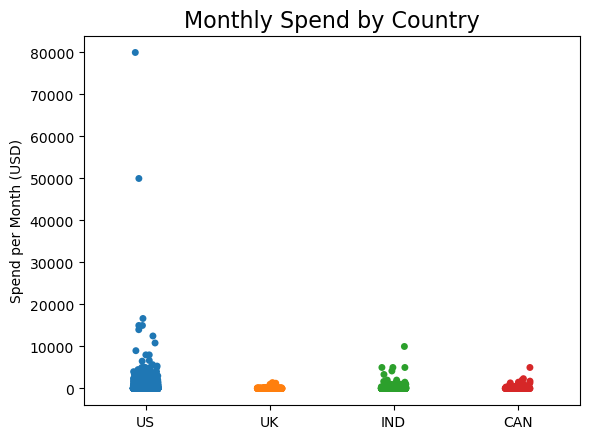

In [390]:
# Examine Distribution of Monthly Spend

top_4 = good_data[good_data['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')].copy()

sns.stripplot(y='monthly_avg',x='CountryLive',data=top_4)
plt.title('Monthly Spend by Country',fontsize=16)
plt.ylabel('Spend per Month (USD)')
plt.xticks(range(4),['US','UK','IND','CAN'])
plt.xlabel('')

In [391]:
# Remove Extreme Outliers ($20K per Month and up)

good_data = good_data[good_data['monthly_avg']<20000]

# Removes 2 extreme observations in US

In [392]:
# Recalculate Country Means

country_mean = good_data.groupby('CountryLive').mean()

country_mean['monthly_avg'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: monthly_avg, dtype: float64

Text(0.5, 0, '')

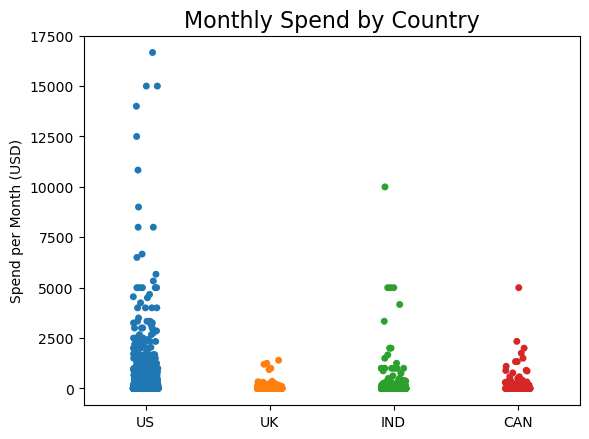

In [393]:
# Examine New Distribution of Monthly Spend

top_4 = good_data[good_data['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')].copy()

sns.stripplot(y='monthly_avg',x='CountryLive',data=top_4)
plt.title('Monthly Spend by Country',fontsize=16)
plt.ylabel('Spend per Month (USD)')
plt.xticks(range(4),['US','UK','IND','CAN'])
plt.xlabel('')

In [394]:
# Inspect Outliers in US (Monthly Spend $5000 and Up)

us_outliers = top_4[(top_4['CountryLive']=='United States of America') & (top_4['monthly_avg']>=5000)]

In [395]:
# Review Bootcamp Attendance

inspect_us = us_outliers[['CountryLive','AttendedBootcamp','BootcampName','MonthsProgramming','MoneyForLearning','monthly_avg']].sort_values(by='monthly_avg')
inspect_us['AttendedBootcamp'].value_counts(dropna=False)

1.0    11
0.0     7
Name: AttendedBootcamp, dtype: int64

In [396]:
# Remove US Respondents who didn't attend a Bootcamp or those programming less than 3 months

bootcamp_bool = (top_4['CountryLive'] == 'United States of America') & \
                (top_4['monthly_avg'] >= 5000) & \
                (top_4['AttendedBootcamp'] == 0)

top_4 = top_4[~bootcamp_bool]


less_than_3 = (top_4['CountryLive'] == 'United States of America') & \
              (top_4['monthly_avg'] >= 5000) & \
              (top_4['MonthsProgramming'] <= 3)

top_4 = top_4[~less_than_3]


Text(0.5, 0, '')

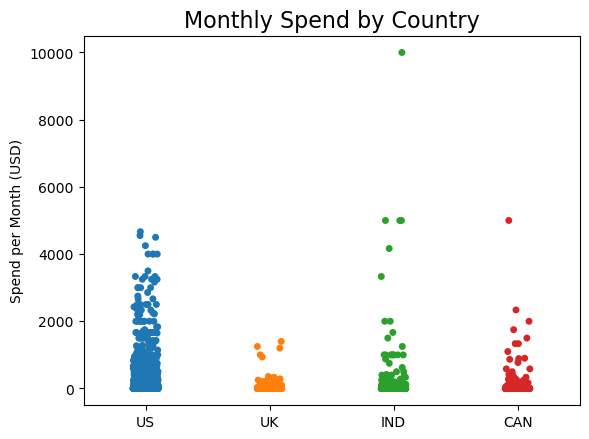

In [397]:
# View Updated Distribution

sns.stripplot(y='monthly_avg',x='CountryLive',data=top_4)
plt.title('Monthly Spend by Country',fontsize=16)
plt.ylabel('Spend per Month (USD)')
plt.xticks(range(4),['US','UK','IND','CAN'])
plt.xlabel('')

In [398]:
# Inspect Outliers in India

india_outliers = top_4[(top_4['CountryLive'] == 'India') & \
                       (top_4['monthly_avg'] >= 3000)]

inspect_india = india_outliers[['CountryLive','AttendedBootcamp','BootcampName',\
'MonthsProgramming','MoneyForLearning','monthly_avg']].sort_values(by='monthly_avg')

inspect_india

,CountryLive,AttendedBootcamp,BootcampName,MonthsProgramming,MoneyForLearning,monthly_avg
1755,India,0.0,NaN,15.0,50000.0,3333.333333
15587,India,0.0,NaN,24.0,100000.0,4166.666667
1728,India,0.0,NaN,4.0,20000.0,5000.000000
7989,India,0.0,NaN,1.0,5000.0,5000.000000
8126,India,0.0,NaN,1.0,5000.0,5000.000000
13398,India,0.0,NaN,2.0,20000.0,10000.000000


In [399]:
# Drop Outliers in India

top_4 = top_4.drop(india_outliers.index)

Text(0.5, 0, '')

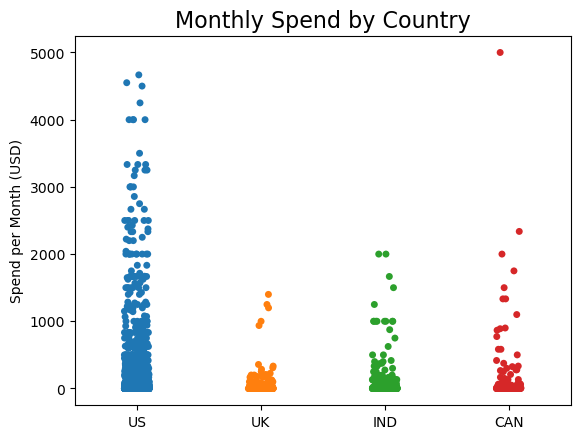

In [400]:
# View Updated Distribution

sns.stripplot(y='monthly_avg',x='CountryLive',data=top_4)
plt.title('Monthly Spend by Country',fontsize=16)
plt.ylabel('Spend per Month (USD)')
plt.xticks(range(4),['US','UK','IND','CAN'])
plt.xlabel('')

In [403]:
canada_outliers = top_4[(top_4['CountryLive']=='Canada') & \
                  (top_4['monthly_avg'] >= 3000)]

inspect_canada = canada_outliers[['CountryLive','AttendedBootcamp','BootcampName',\
'MonthsProgramming','MoneyForLearning','monthly_avg']].sort_values(by='monthly_avg')

inspect_canada

,CountryLive,AttendedBootcamp,BootcampName,MonthsProgramming,MoneyForLearning,monthly_avg
13659,Canada,1.0,Bloc.io,2.0,10000.0,5000.0


In [404]:
# Drop Outliers in Canada

top_4 = top_4.drop(canada_outliers.index)

Text(0.5, 0, '')

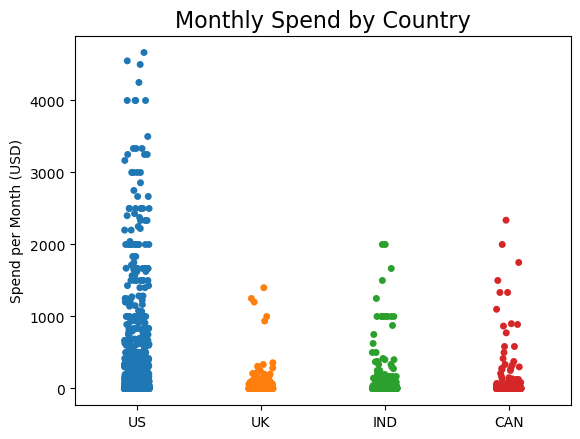

In [410]:
# View Updated Distribution of Spend by Students in Top 4 Countries

sns.stripplot(y='monthly_avg',x='CountryLive',data=top_4)
plt.title('Monthly Spend by Country',fontsize=16)
plt.ylabel('Spend per Month (USD)')
plt.xticks(range(4),['US','UK','IND','CAN'])
plt.xlabel('')

In [409]:
# Recalculate the Mean Monthly Average Students Spend in Top 4 Countries

print(top_4.groupby('CountryLive').mean()['monthly_avg'].sort_values(ascending=False))

CountryLive
United States of America    130.639017
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: monthly_avg, dtype: float64


In [412]:
top_4['CountryLive'].value_counts(normalize=True)*100

United States of America    74.922840
India                       11.754115
United Kingdom               7.175926
Canada                       6.147119
Name: CountryLive, dtype: float64

# Top Markets to Advertise

- US & Canada Contain over 80% of Respondents
- Strong Monthly Average Spend on Educational Content
- Similar culture and timezone
